In [1]:
input <- mtcars[,c("am","cyl","hp","wt")]
model = glm(formula = am ~ cyl + hp + wt, data = input, family = binomial)
print(summary(model))


Call:
glm(formula = am ~ cyl + hp + wt, family = binomial, data = input)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.17272  -0.14907  -0.01464   0.14116   1.27641  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 19.70288    8.11637   2.428   0.0152 *
cyl          0.48760    1.07162   0.455   0.6491  
hp           0.03259    0.01886   1.728   0.0840 .
wt          -9.14947    4.15332  -2.203   0.0276 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.2297  on 31  degrees of freedom
Residual deviance:  9.8415  on 28  degrees of freedom
AIC: 17.841

Number of Fisher Scoring iterations: 8



In [2]:
p = data.frame(cyl = 6 ,hp = 105 , wt = 3.460)
predict(model,p,type='response')

1 
0.003660188

In [3]:
df = read.csv("diabetes.csv")
head(df)

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1      
4 0.167                    21  0      
5 2.288                    33  1      
6 0.201                    30  0

In [4]:
summary(df)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [5]:
any(is.na(df))

[1] FALSE

In [6]:
library(ggplot2)
ggplot(df,aes(Outcome)) + geom_bar(aes(fill=factor(Outcome)),alpha=0.5)

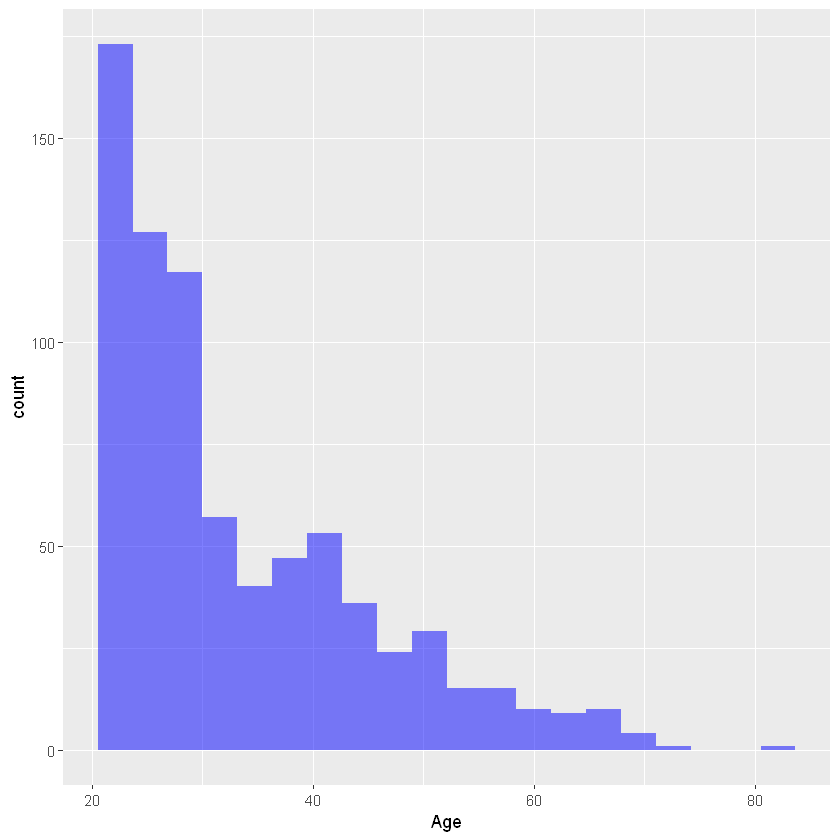

In [7]:
ggplot(df,aes(Age)) + geom_histogram(fill='blue',bins=20,alpha=0.5)

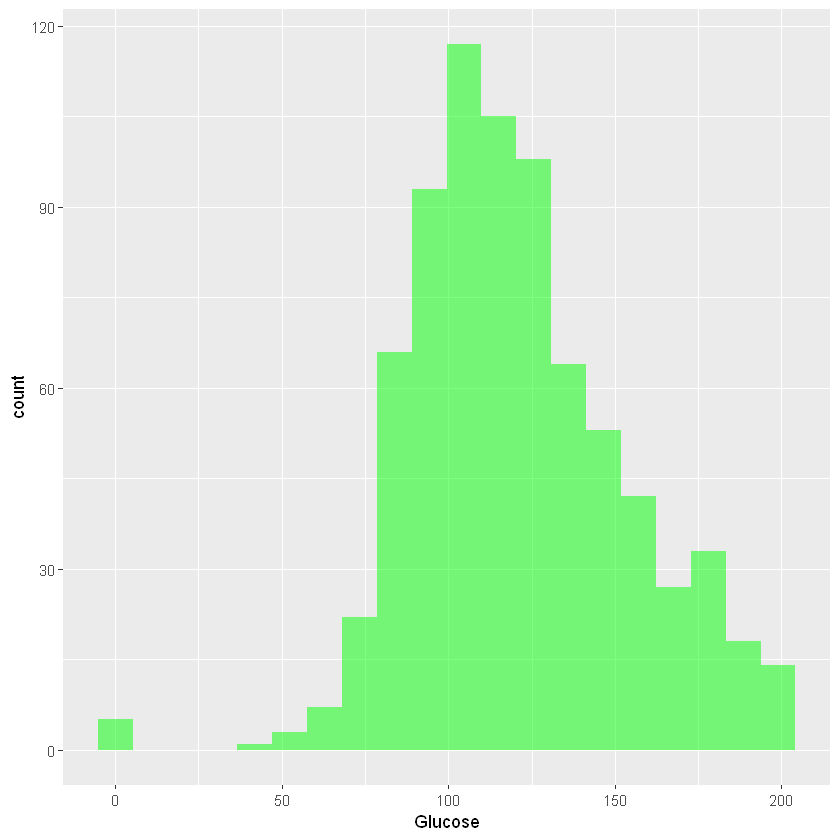

In [8]:
ggplot(df,aes(Glucose)) + geom_histogram(fill='green',bins=20,alpha=0.5)

In [9]:
pl <- ggplot(df,aes(Outcome, Age)) + geom_boxplot(aes(group=Outcome,fill=factor(Outcome),alpha=0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

In [10]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [11]:
library(caTools)
set.seed(101)

split = sample.split(df$Outcome, SplitRatio = 0.70)

train = subset(df, split == TRUE)
test = subset(df, split == FALSE)

In [12]:
model <- glm(formula=Outcome ~ . , family = binomial(link='logit'),data = train)

In [13]:
summary(model)


Call:
glm(formula = Outcome ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4658  -0.7549  -0.4273   0.7630   3.0139  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -7.7785803  0.8266590  -9.410  < 2e-16 ***
Pregnancies               0.1383874  0.0376875   3.672 0.000241 ***
Glucose                   0.0358321  0.0044290   8.090 5.95e-16 ***
BloodPressure            -0.0124984  0.0059136  -2.114 0.034558 *  
SkinThickness            -0.0057133  0.0078578  -0.727 0.467174    
Insulin                  -0.0008722  0.0010368  -0.841 0.400240    
BMI                       0.0780023  0.0172130   4.532 5.85e-06 ***
DiabetesPedigreeFunction  0.7789540  0.3512939   2.217 0.026597 *  
Age                       0.0073174  0.0112796   0.649 0.516517    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial 

In [14]:
pred <- predict(model,newdata=test,type='response')

In [15]:
results <- ifelse(pred > 0.5,1,0)

In [16]:
misClasificError <- mean(results != test$Outcome)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.795652173913043"


In [17]:
table(test$Outcome, pred > 0.5)

   
    FALSE TRUE
  0   135   15
  1    32   48

In [18]:
anova(model, test = 'Chisq')

Df Deviance    Resid. Df Resid. Dev Pr(>Chi)    
NULL                     NA          NA 537       696.2804             NA
Pregnancies               1  25.8714725 536       670.4090   3.649226e-07
Glucose                   1 120.1233351 535       550.2856   5.944735e-28
BloodPressure             1   1.3696958 534       548.9159   2.418642e-01
SkinThickness             1   0.3852711 533       548.5307   5.347957e-01
Insulin                   1   0.5988902 532       547.9318   4.390018e-01
BMI                       1  23.2536183 531       524.6781   1.419831e-06
DiabetesPedigreeFunction  1   5.0675773 530       519.6106   2.437743e-02
Age                       1   0.4189476 529       519.1916   5.174626e-01

logical(0)

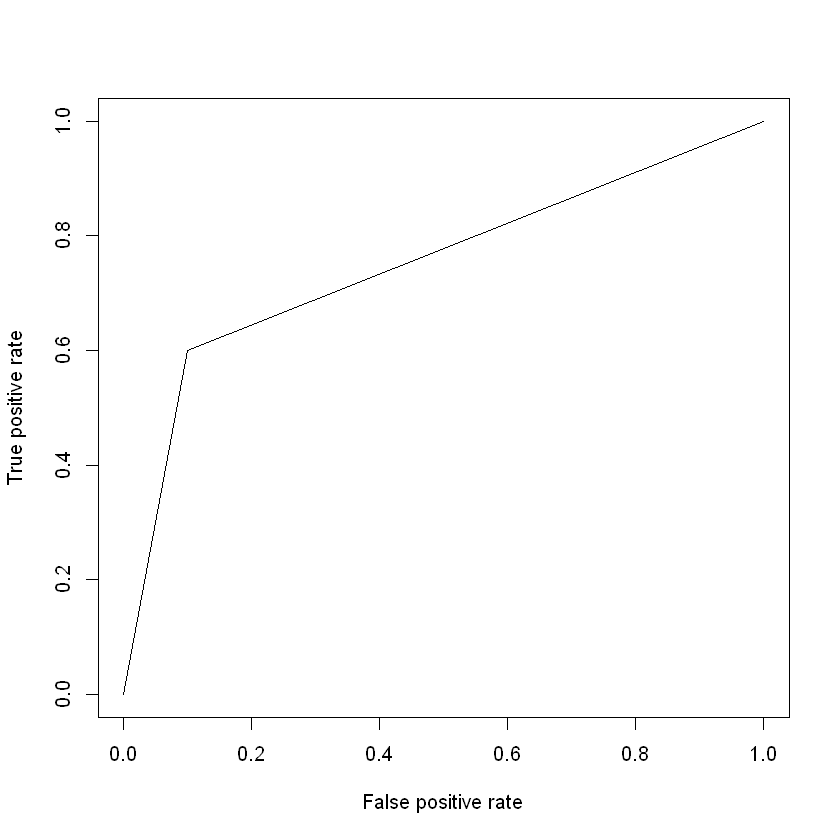

In [19]:
library(ROCR) 
library(Metrics)
pr <- prediction(results,test$Outcome)
perf <- performance(pr,measure = "tpr",x.measure = "fpr") 
plot(perf) > auc(test$Outcome,results)